<a href="https://colab.research.google.com/github/BozhkoIryna/Python-projects/blob/main/Python_for_DA_Module_Task_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

перша частина завдання: [Python for DA Module Task](https://colab.research.google.com/drive/1b9Lc6-k_hYy7ooRr8pmrTfok_PEjl09y#scrollTo=IwFlXLlsUbXq)

Причина перенесення данних: Помилка "Сеанс прекращен, так как объем ОЗУ полностью исчерпан."

In [ ]:
#  завантажуємо бібліотеки Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# Завантажую датасет

from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/dataset
data = pd.read_csv("data.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/dataset


,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,country_name,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1328 non-null   int64  
 1   order_date      1328 non-null   object 
 2   ship_date       1328 non-null   object 
 3   order_priority  1328 non-null   object 
 4   country_code    1328 non-null   object 
 5   product_id      1328 non-null   int64  
 6   sales_channel   1328 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1328 non-null   float64
 9   unit_cost       1328 non-null   float64
 10  item_type       1328 non-null   object 
 11  country_name    1246 non-null   object 
 12  region          1246 non-null   object 
 13  sub-region      1246 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 145.4+ KB


#**Data analysis and visualization**
Аналіз та візуалізація даних, знаходження цінних інсайтів.

In [ ]:
#прорахунок загального доходу
data["revenue"] = ((data["units_sold"]) * data["unit_price"])
data["cost"] = ((data["units_sold"]) * data["unit_price"])
data.head()


,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,country_name,region,sub-region,revenue,cost
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe,133705.00,133705.00
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe,409960.10,409960.10
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,3136191.11,3136191.11
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe,127966.88,127966.88
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe,362897.60,362897.60


## Робота з ключовими метриками діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість проданих товарів, розподіл по регіонам.
**Total orders:** 1328

**Total Revenue ($):** 1702129408.21

**Total Unints sold:** 6576524.0

**Total countries:** 45

Найбільша кількість замовлень відбувається з **країн Південної Європи.**

In [ ]:
# Загальна кількість замовлень
total_orders = data["order_id"].count()
print("Total orders:", total_orders)

#Загальний прибуток
total_revenue = data["revenue"].sum()
print("Total Revenue ($):", total_revenue)

#Загальна кількість проданих товарів
total_units_sold = data["units_sold"].sum()
print("Total Unints sold:", total_units_sold)

#Загальна кількість охоплених країн
unique_countries = data["country_name"].nunique()
print("Total countries:", unique_countries)

Total orders: 1328
Total Revenue ($): 1702129408.21
Total Unints sold: 6576524.0
Total countries: 45


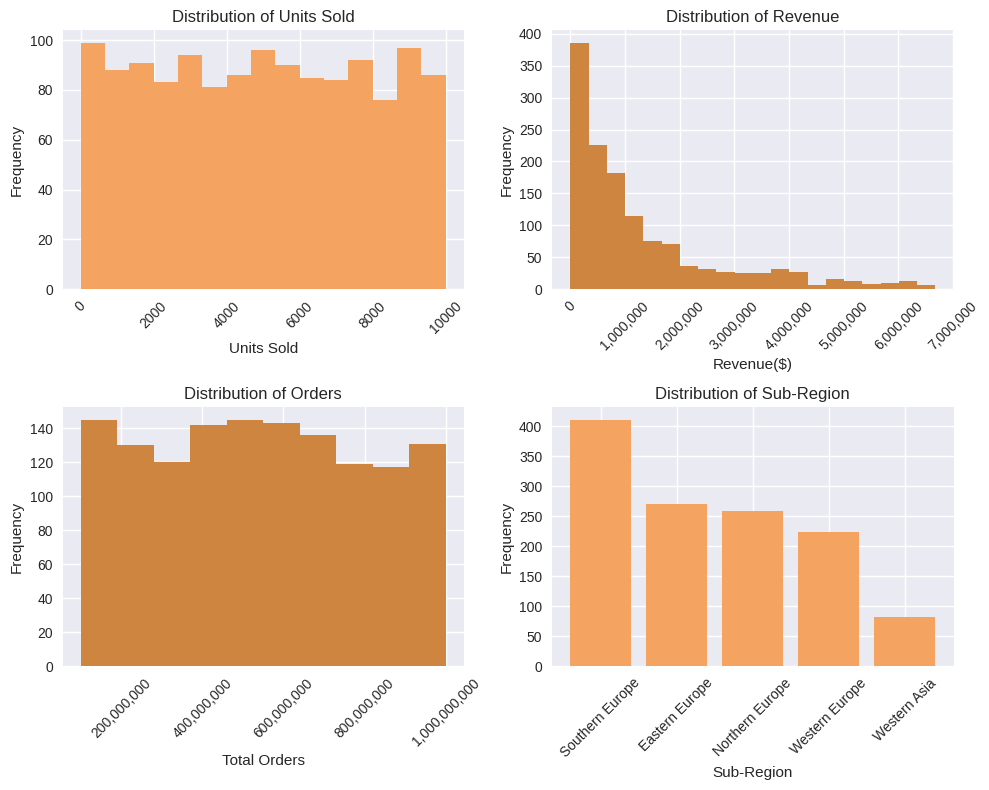

In [ ]:
# Аналіз ключових метрик діяльності компанії
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

#розподіл кількості проданих товарів
ax[0, 0].hist(data["units_sold"], bins=15, color="sandybrown")
ax[0, 0].set_title("Distribution of Units Sold")
ax[0, 0].set_xlabel("Units Sold")
ax[0, 0].set_ylabel("Frequency")
ax[0, 0].tick_params(axis='x', rotation=45)

#розподіл суми доходів
ax[0, 1].hist(data["revenue"], bins=20, color="peru")
ax[0, 1].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax[0, 1].set_title("Distribution of Revenue")
ax[0, 1].set_xlabel("Revenue($)")
ax[0, 1].set_ylabel("Frequency")
ax[0, 1].tick_params(axis='x', rotation=45)

#розподіл загальної кількості замовлень

ax[1, 0].hist(data["order_id"], bins=10, color="peru")
ax[1, 0].xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax[1, 0].set_title("Distribution of Orders")
ax[1, 0].set_xlabel("Total Orders")
ax[1, 0].set_ylabel("Frequency")
ax[1, 0].tick_params(axis='x', rotation=45)

#розподіл по регіонам
subregion_counts = data["sub-region"].value_counts()
ax[1, 1].bar(subregion_counts.index, subregion_counts.values, color="sandybrown")
ax[1, 1].set_title("Distribution of Sub-Region")
ax[1, 1].set_xlabel("Sub-Region")
ax[1, 1].set_ylabel("Frequency")
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##Аналіз продажей (доходи, витрати, прибутки, популярність товарів) та візуалізації в розрізі:

- категорій товарів;

По загальній сумі доходу найбільше доходу приносить категорія *Office Supplies*, а найменше - *Fruits*. Варто звернути увагу, що динаміка розподілу категорій товарів по розміру доходу не співпадають з кількостю проданих товарів.

- географії (країн, регіонів);

Продажі в Європі значно перевищують над іншими регіонами.

На візуалізації можна бачити розподіл доходу по країнам. Топ-5 країн по розмірам доходу: Czech Republic, Ukraine, Bosnia & Herzegovina, Macedonia, San Morino.


- каналів продажу (онлайн або офлайн).

Розмір доходу не залежить від каналу продажу товарів, хоча офлайн продажі переважають на декілька %.

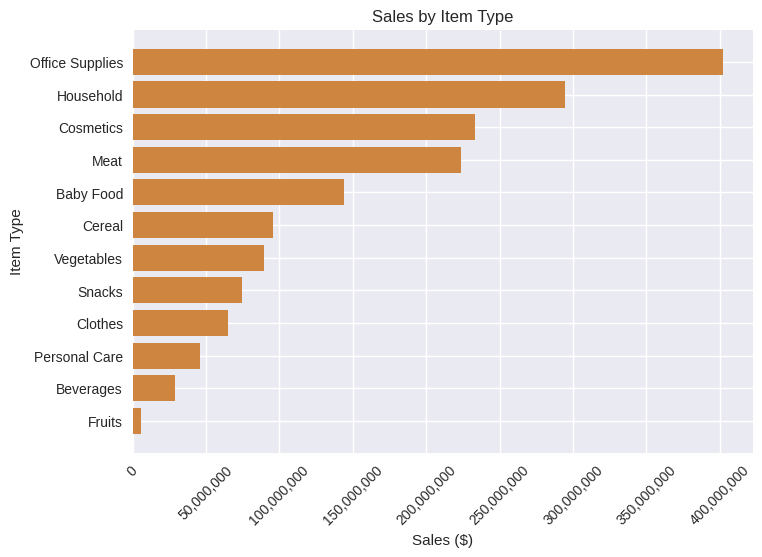

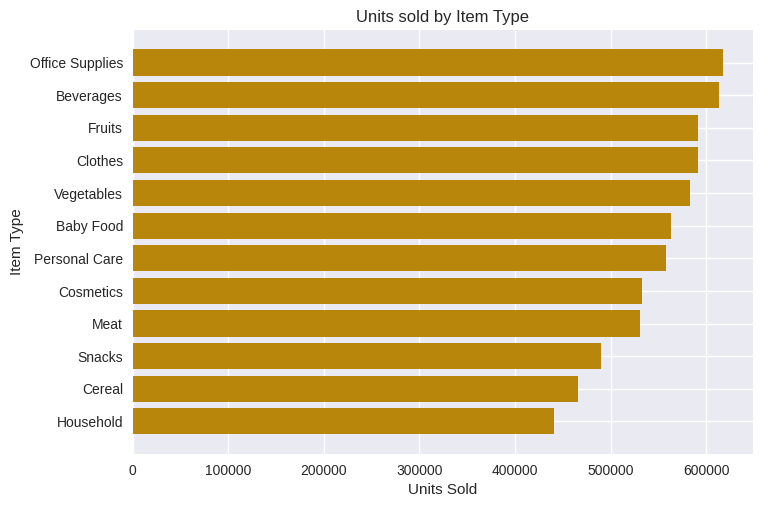

In [ ]:
#розподіл продажів за типом  товарів
sales_by_category = data.groupby("item_type")["revenue"].sum().nsmallest(12)
plt.barh(sales_by_category.index, sales_by_category.values, color="peru")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Sales by Item Type")
plt.xlabel("Sales ($)")
plt.ylabel("Item Type")
plt.xticks(rotation=45)
plt.show()

#розподіл кількості проданих товарів за типом  товарів
unit_sales_by_category = data.groupby("item_type")["units_sold"].sum().nsmallest(12)

plt.barh(unit_sales_by_category.index, unit_sales_by_category.values, color="darkgoldenrod")
plt.title("Units sold by Item Type")
plt.xlabel("Units Sold")
plt.ylabel("Item Type")
plt.show()


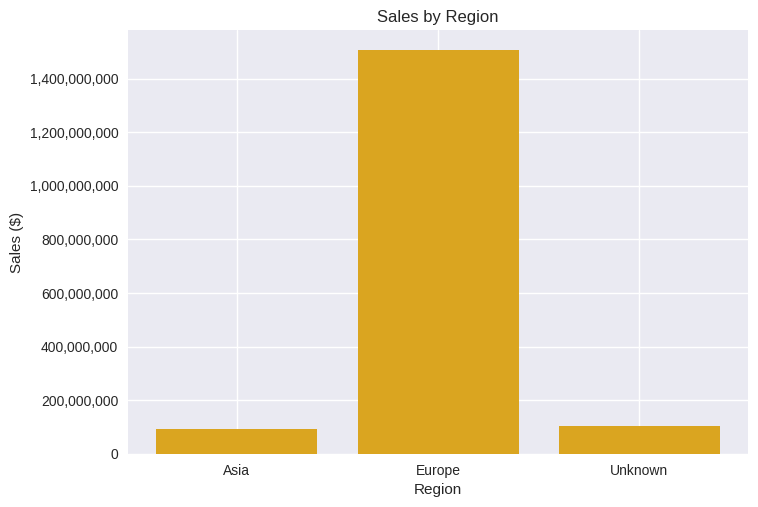

In [ ]:
#розподіл продажів за регІонами
data["region"] = data["region"].fillna("Unknown").astype(str)
sales_by_region = data.groupby("region")["revenue"].sum()

bars = plt.bar(sales_by_region.index, sales_by_region.values, color="goldenrod")

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales ($)")

plt.show()

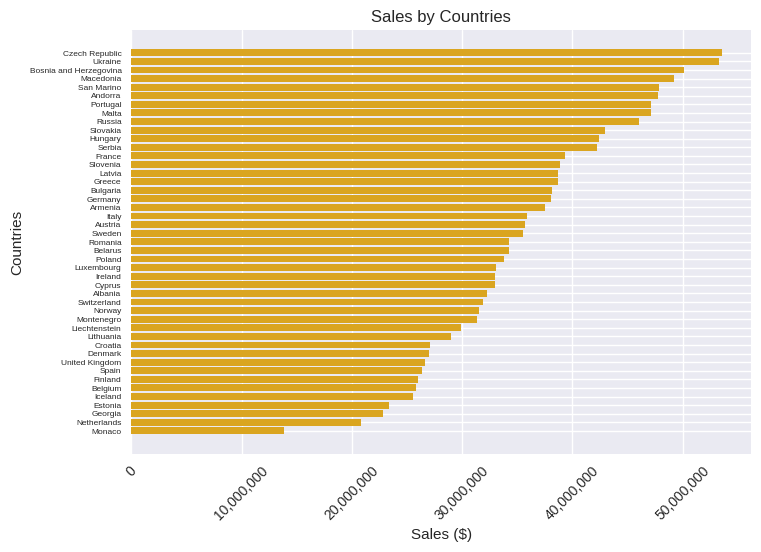

sub-region: ['Northern Europe' 'Southern Europe' nan 'Eastern Europe' 'Western Europe'
 'Western Asia']


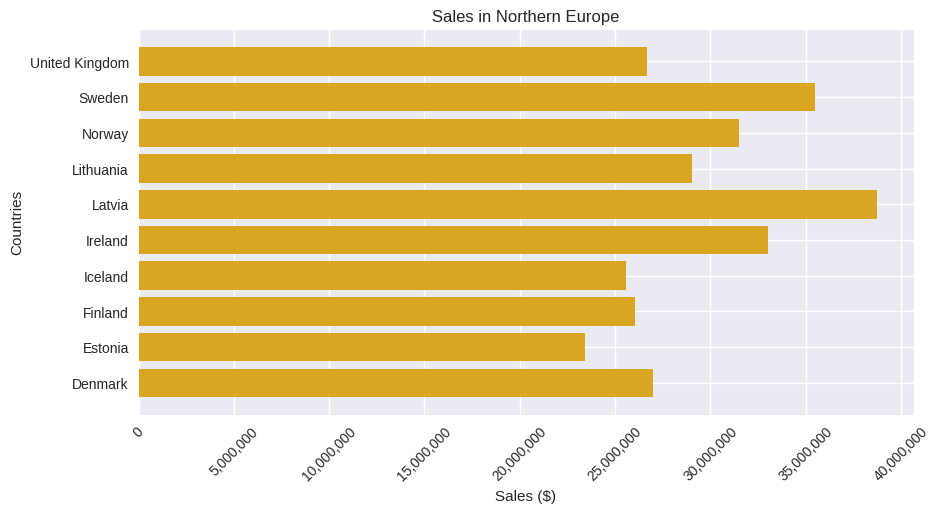

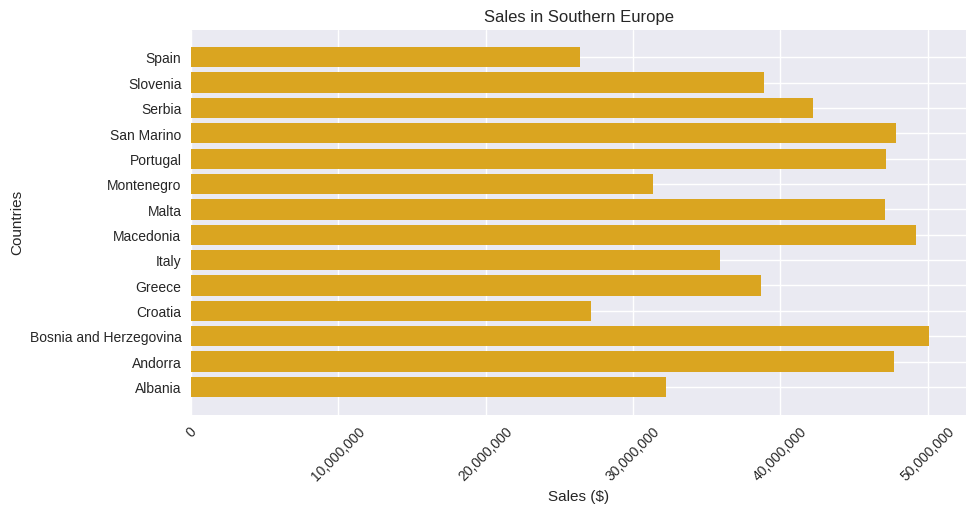

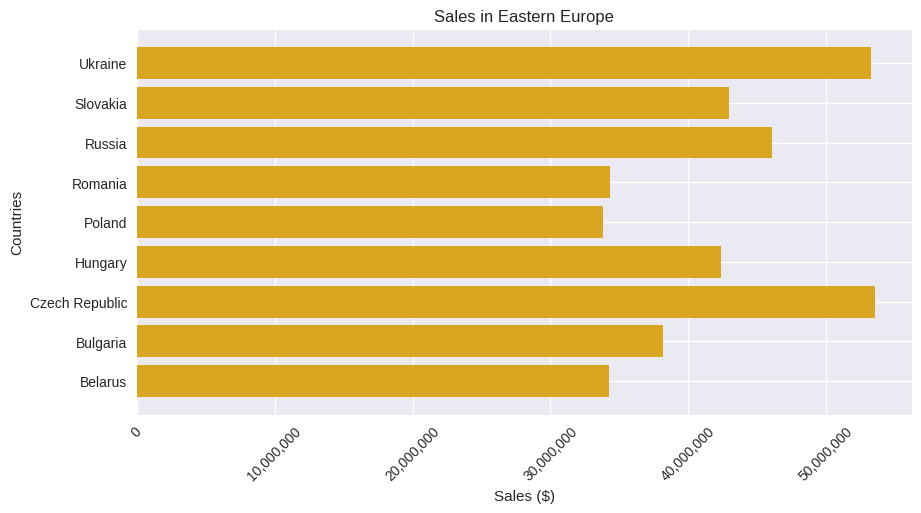

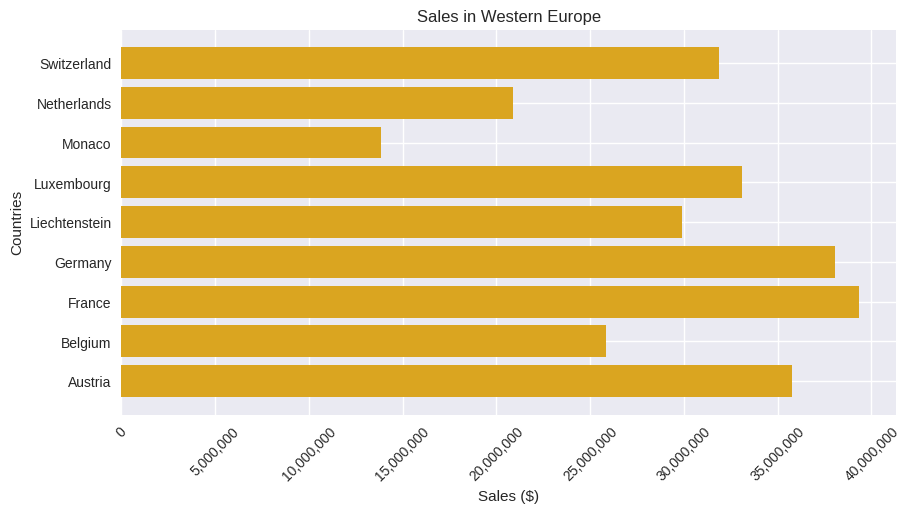

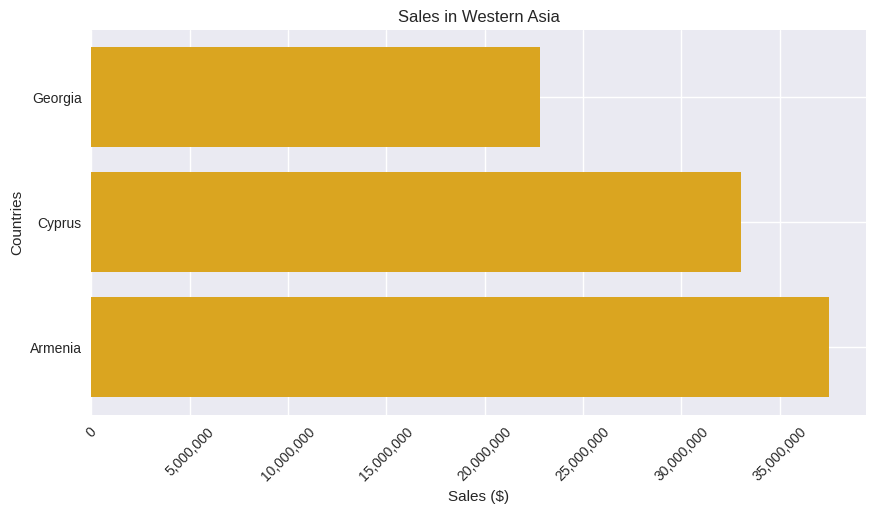

In [ ]:
#розподіл продажів за країнам
sales_by_countries = data.groupby("country_name")["revenue"].sum().nsmallest(45)

plt.barh(sales_by_countries.index, sales_by_countries.values, color="goldenrod")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Sales by Countries")
plt.xlabel("Sales ($)")
plt.ylabel("Countries")
plt.tick_params(axis='x', rotation=45)
plt.yticks(fontsize=6)
plt.show()


# Фільтруємо дані по кожному субрегіону і будуємо окремий графік
subregion = data["sub-region"].unique()
print("sub-region:", subregion)

subregions = ['Northern Europe', 'Southern Europe', 'Eastern Europe', 'Western Europe', 'Western Asia']

for subregion in subregions:
    # Вибірка даних для конкретного субрегіону
    sales_subregion = data[data["sub-region"] == subregion].groupby("country_name")["revenue"].sum()

    # Перевірка на наявність даних у групі
    if not sales_subregion.empty:
        plt.figure(figsize=(10, 5))
        plt.barh(sales_subregion.index, sales_subregion.values, color="goldenrod")
        plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        plt.title(f"Sales in {subregion}")
        plt.xlabel("Sales ($)")
        plt.ylabel("Countries")
        plt.tick_params(axis='x', rotation=45)
        plt.yticks(fontsize=10)
        plt.show()



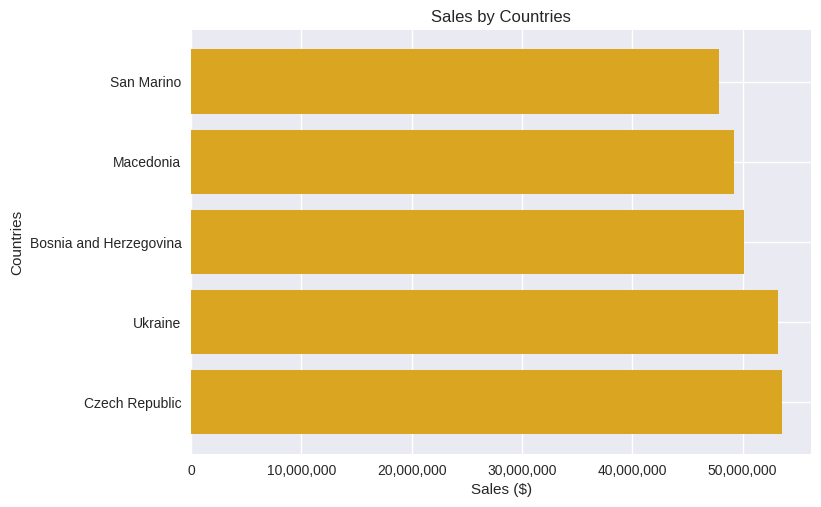

In [ ]:

sales_by_countries = data.groupby("country_name")["revenue"].sum().nlargest()
plt.barh(sales_by_countries.index, sales_by_countries.values, color="goldenrod")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Sales by Countries")
plt.xlabel("Sales ($)")
plt.ylabel("Countries")
plt.yticks(fontsize=10)
plt.show()

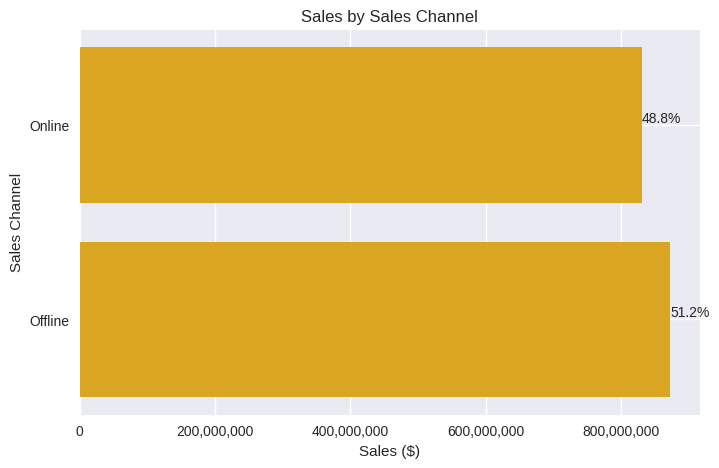

In [ ]:
#розподіл продажів за каналами продажу
data["sales_channel"] = data["sales_channel"].str.replace("online", "Online").astype(object)

sales_by_sales_channel = data.groupby("sales_channel")["revenue"].sum()
total_sales = sales_by_sales_channel.sum()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(sales_by_sales_channel.index, sales_by_sales_channel.values, color="goldenrod")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
for bar in bars:
    value = bar.get_width()
    percent = value / total_sales * 100
    ax.text(value, bar.get_y() + bar.get_height() / 2,
            f"{percent:.1f}%",
            va="bottom")
plt.title("Sales by Sales Channel")
plt.xlabel("Sales ($)")
plt.ylabel("Sales Channel")
plt.show()


##Аналіз інтервалу часу між замовленням та його відвантаженням.
**Average time interval:** 24.79 days

**Min time interval:** 0.00 days

**Max time interval:** 50.00 days

Відповідні візуалізації в розрізі:

- категорій товарів;
- країн;
- регіонів.

В країнах Азії час відправлення товарів більший за відправку в європейських країнах.

**Прибуток залежить від часу, необхідного на відвантаження товару.**

In [ ]:
# розрахунок інтервалу часу
data["order_date"] = pd.to_datetime(data["order_date"], errors='coerce')
data["ship_date"] = pd.to_datetime(data["ship_date"])
data["time_interval"] = ((data["ship_date"]) - data["order_date"]).dt.days
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country_code    1328 non-null   object        
 5   product_id      1328 non-null   int64         
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
 10  item_type       1328 non-null   object        
 11  country_name    1246 non-null   object        
 12  region          1328 non-null   object        
 13  sub-region      1246 non-null   object        
 14  revenue         1328 non-null   float64       
 15  cost

In [ ]:
average_time_interval = data["time_interval"].mean()
print(f"Average time interval: {average_time_interval:.2f} days")
min_time_interval = data["time_interval"].min()
print(f"Min time interval: {min_time_interval:.2f} days")
max_time_interval = data["time_interval"].max()
print(f"Max time interval: {max_time_interval:.2f} days")


Average time interval: 24.79 days
Min time interval: 0.00 days
Max time interval: 50.00 days


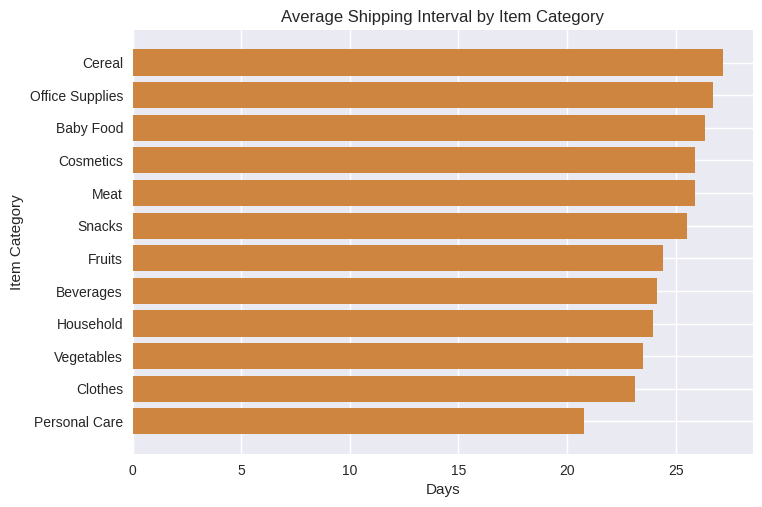

In [ ]:
# групування за категоріями
shipping_by_category = data.groupby("item_type")["time_interval"].mean().nsmallest(12)

plt.barh(shipping_by_category.index, shipping_by_category.values, color="peru")
# for bar in bars:
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}', va='center')
plt.title("Average Shipping Interval by Item Category")
plt.xlabel("Days")
plt.ylabel("Item Category")
plt.show()


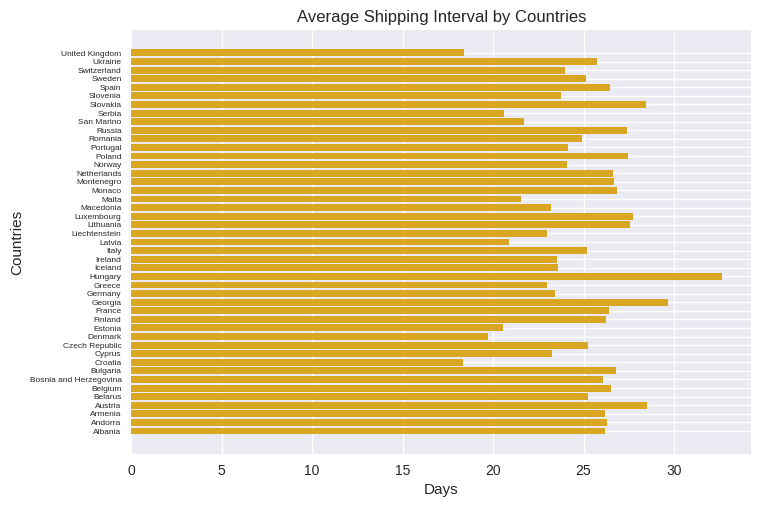

In [ ]:
# групування за країнами
shipping_by_countries = data.groupby("country_name")["time_interval"].mean()

plt.barh(shipping_by_countries.index, shipping_by_countries.values, color="goldenrod")
plt.title("Average Shipping Interval by Countries")
plt.xlabel("Days")
plt.ylabel("Countries")
plt.yticks(fontsize=6)
plt.show()

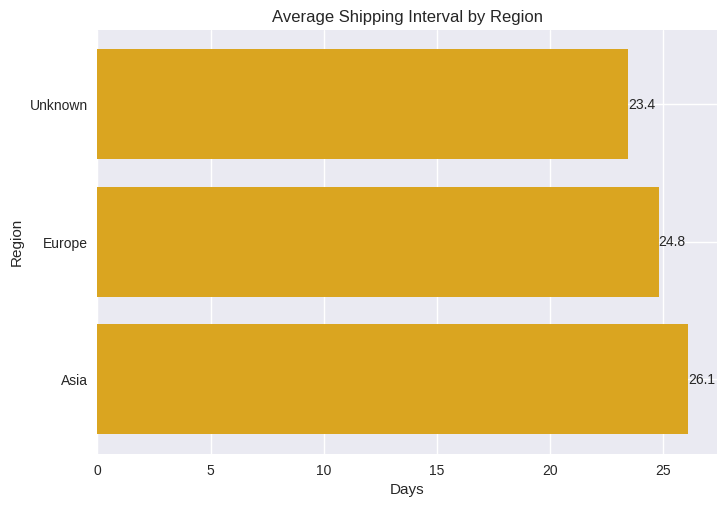

In [ ]:
# групування за регіонам
shipping_by_region = data.groupby("region")["time_interval"].mean()

bars = plt.barh(shipping_by_region.index, shipping_by_region.values, color="goldenrod")
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}', va='center')
plt.title("Average Shipping Interval by Region")
plt.xlabel("Days")
plt.ylabel("Region")
plt.show()

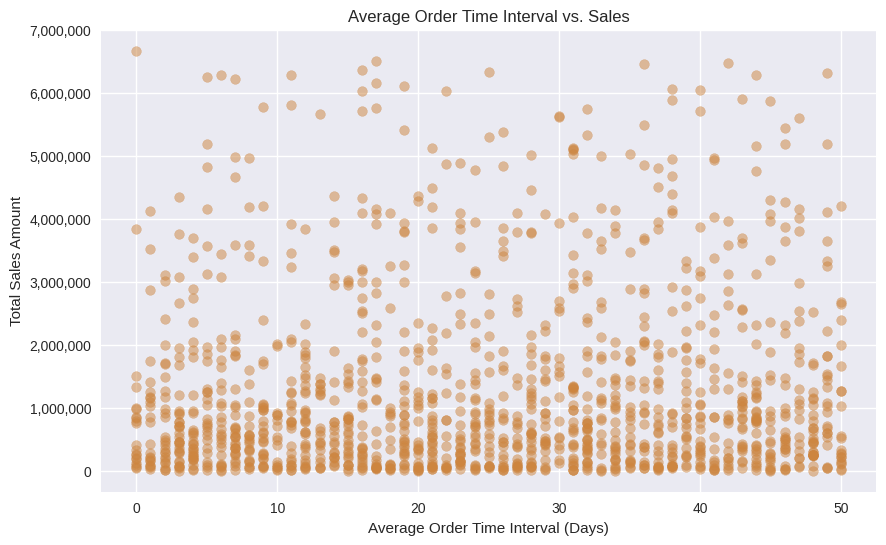

In [ ]:
# аналіз чи залежить прибуток від часу, необхідного на відвантаження товару.
avg_time_interval = data.groupby("order_id")["time_interval"].mean()
avg_time_interval_sales = data.groupby("order_id")["revenue"].sum()


plt.figure(figsize=(10, 6))
plt.scatter(avg_time_interval, avg_time_interval_sales, alpha=0.5, color="peru")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Average Order Time Interval (Days)")
plt.ylabel("Total Sales Amount")
plt.title("Average Order Time Interval vs. Sales")
plt.grid(True)
plt.show()


## Аналіз за допомогою візуалізації динаміки продажів (у часі) у розрізі категорій товарів, країн, регіонів, визначаємо основні тенденції.

Найбільші показники доходів компанії були в 2012 році, потім різких спад в 2013, і далі спостерігається поступове зниження доходу.

На візуалізації можна бачити динаміку продажів кожної категорії за роками та місяцями. Окремо ми вивели дані по категорії-лідеру  *Office Supplies*. 2015 показав найбільший показник доходу по цій категорії.

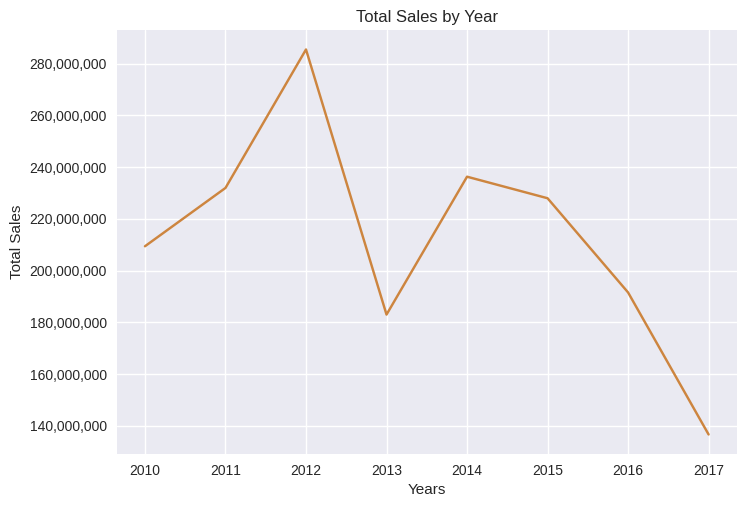

In [ ]:
# Візуалізація динаміки продажів у часі за роками

data["year"] = data["order_date"].dt.year

# Загальні продажі по рокам
yearly_sales = data.groupby("year")["revenue"].sum()
yearly_sales.plot(
    kind="line", xlabel="Years", ylabel="Total Sales", title="Total Sales by Year", color="peru"
)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0)
plt.show()

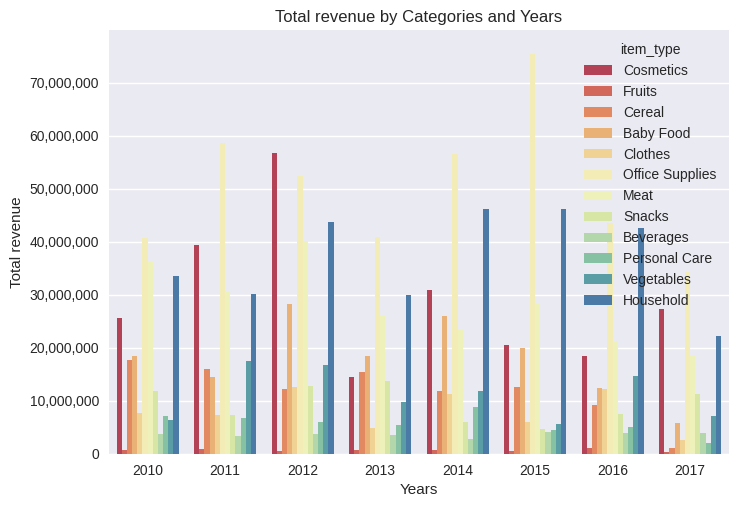

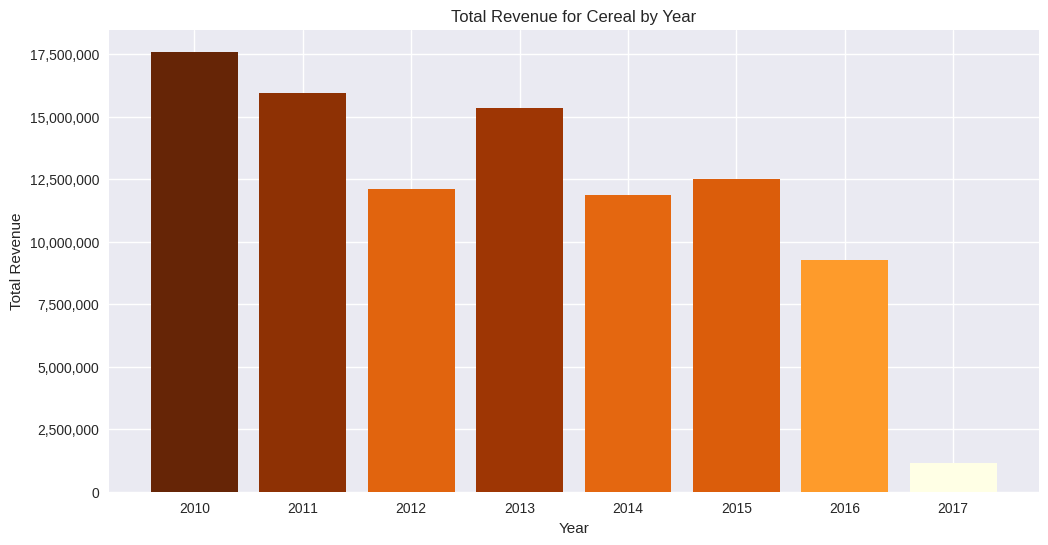

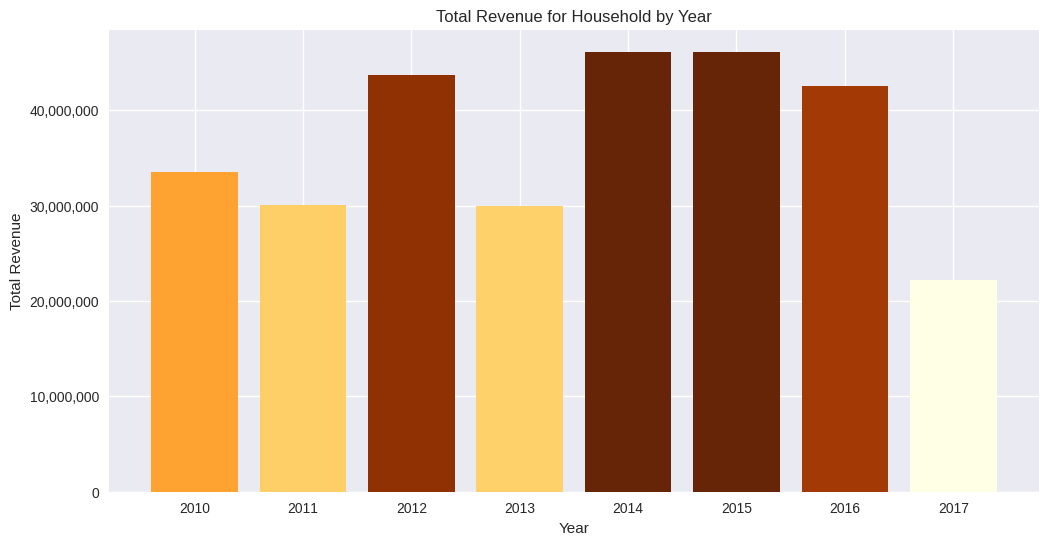

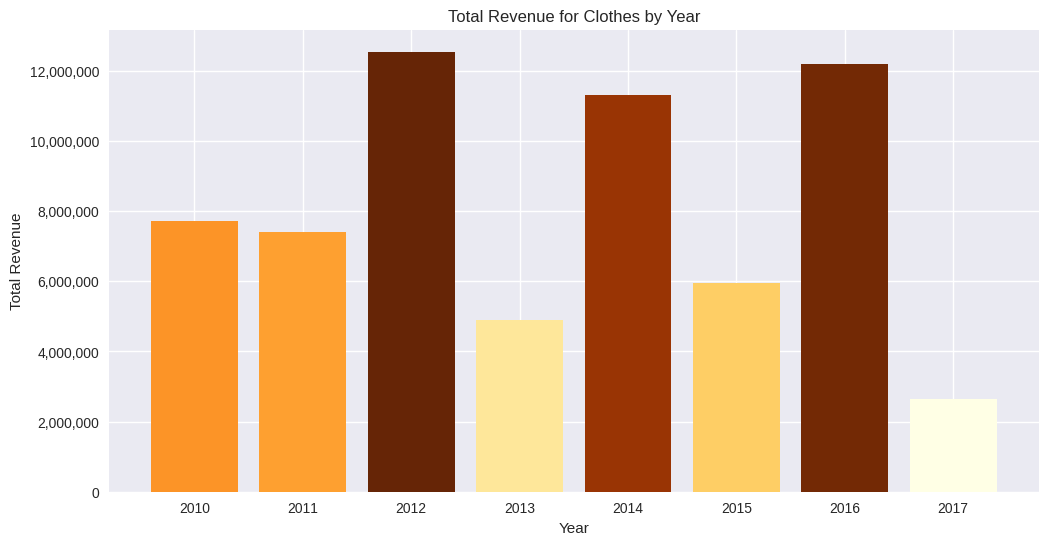

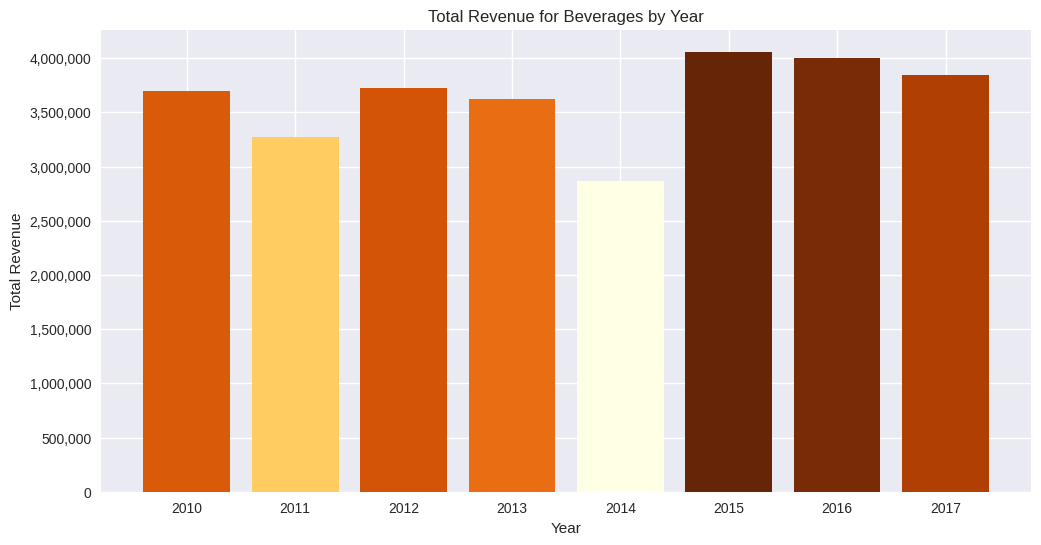

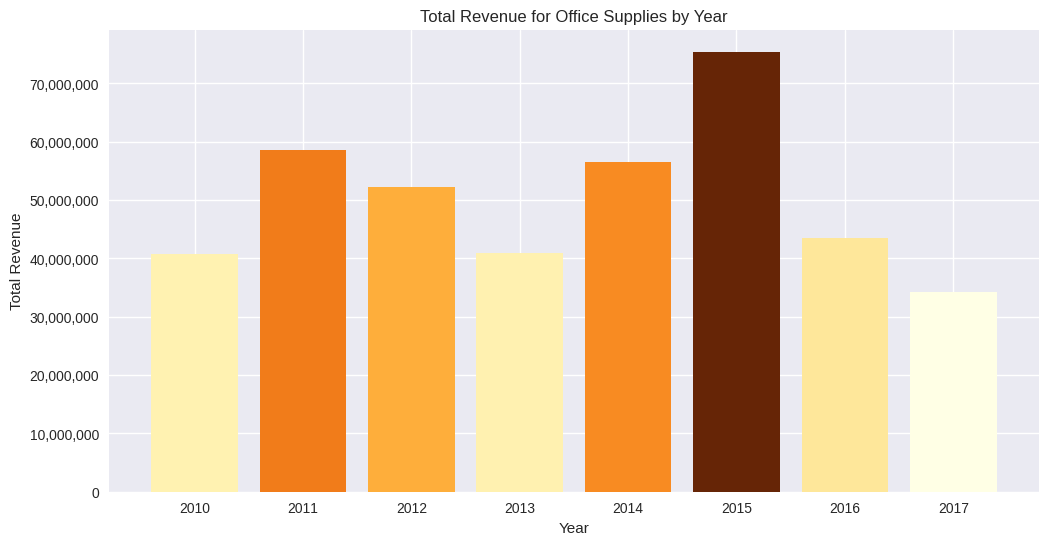

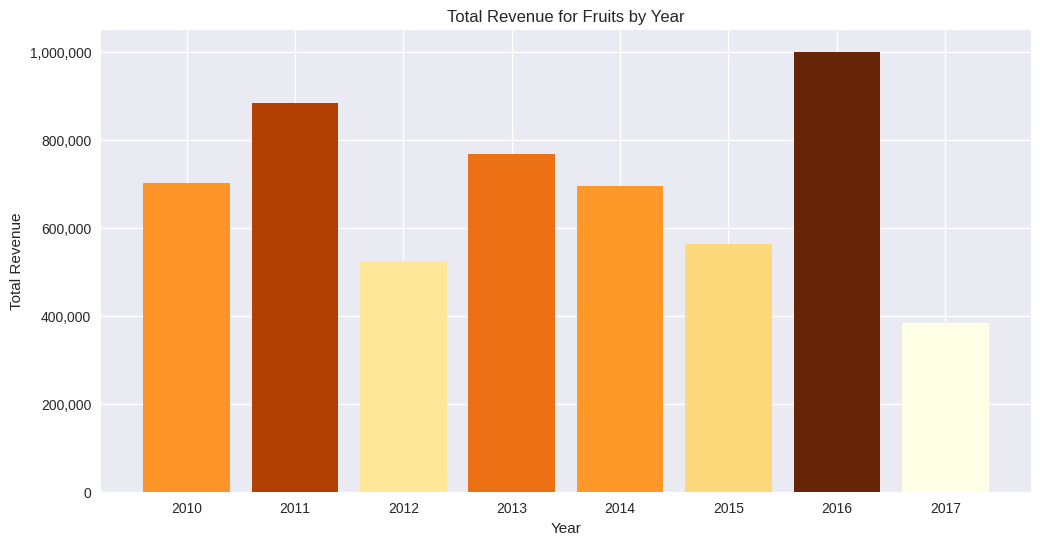

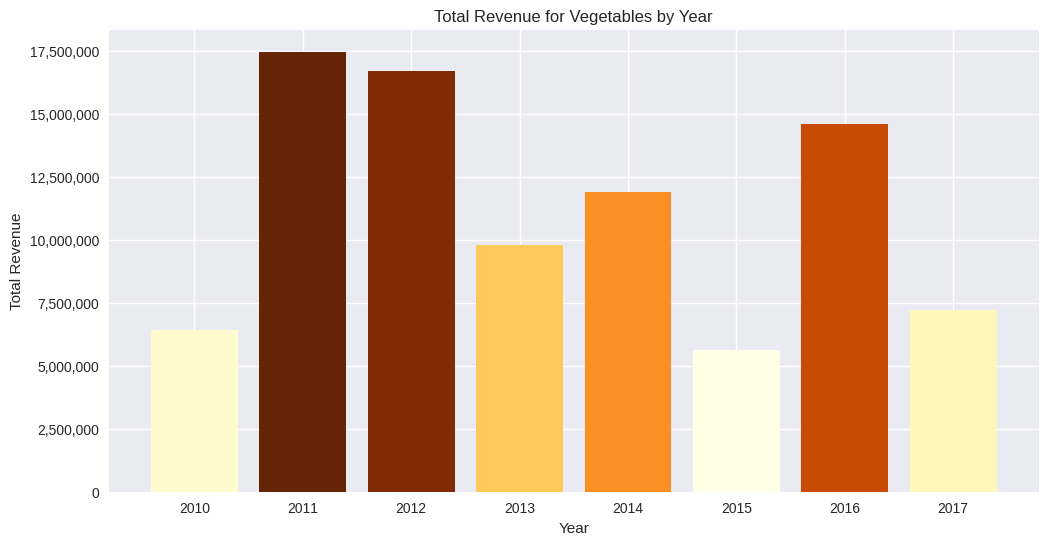

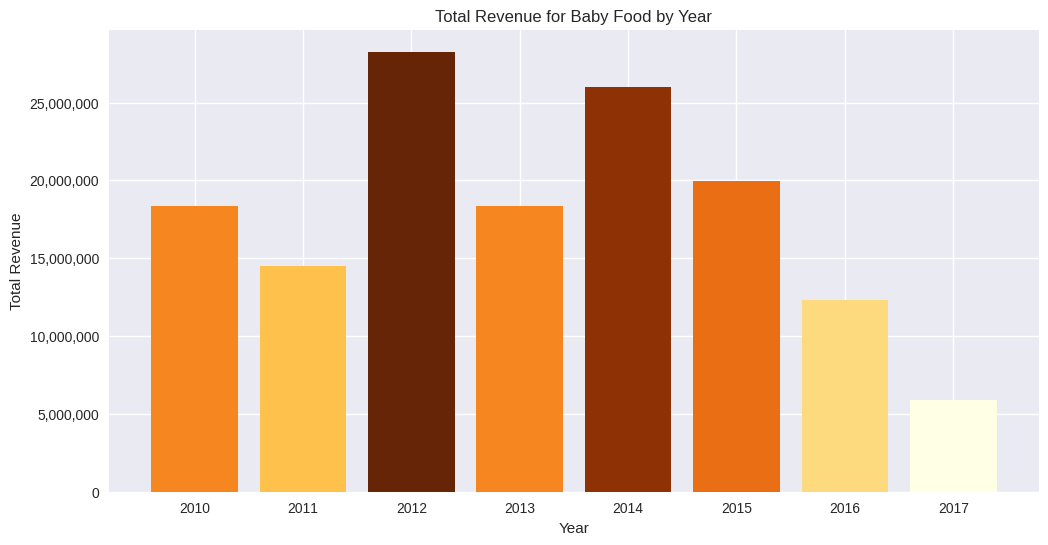

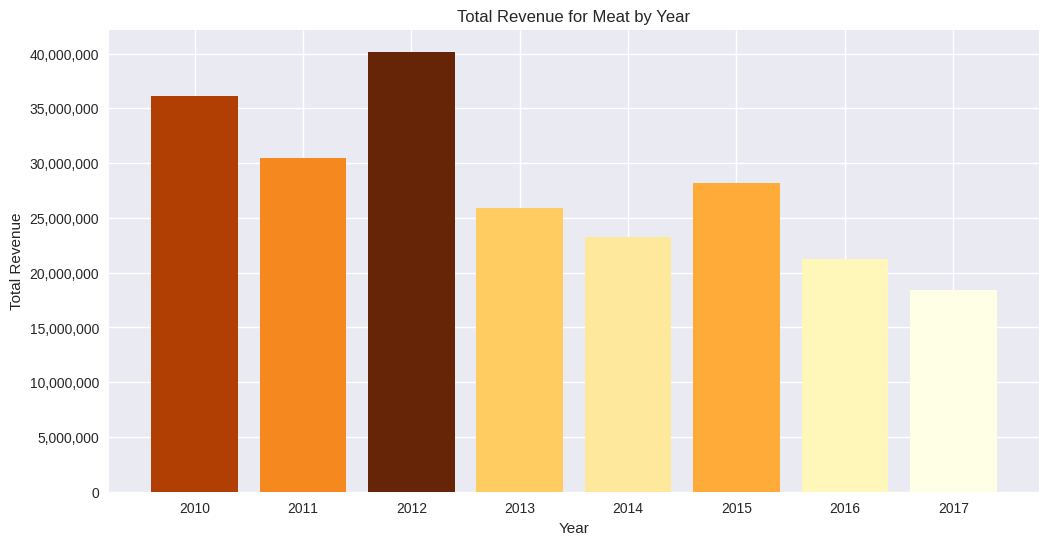

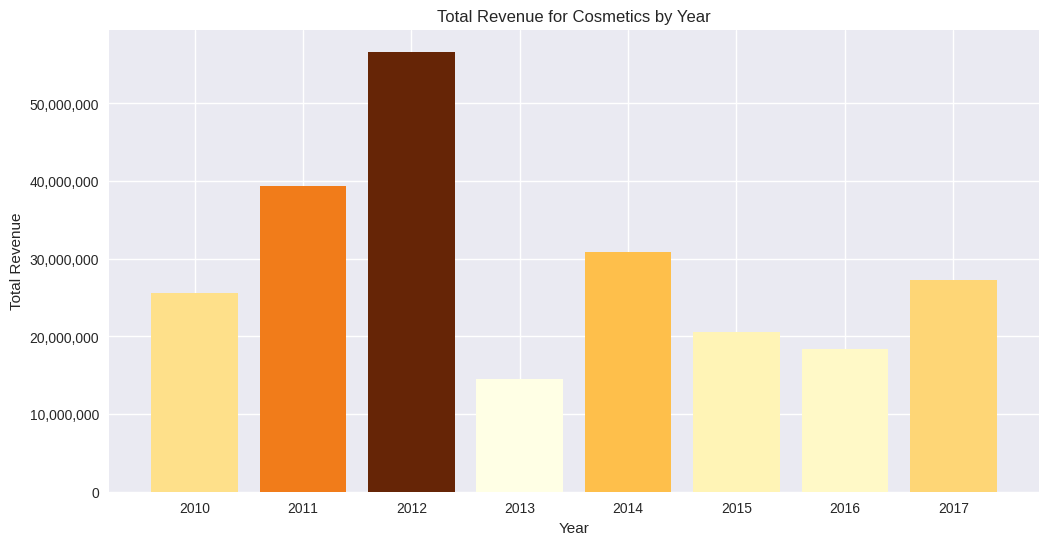

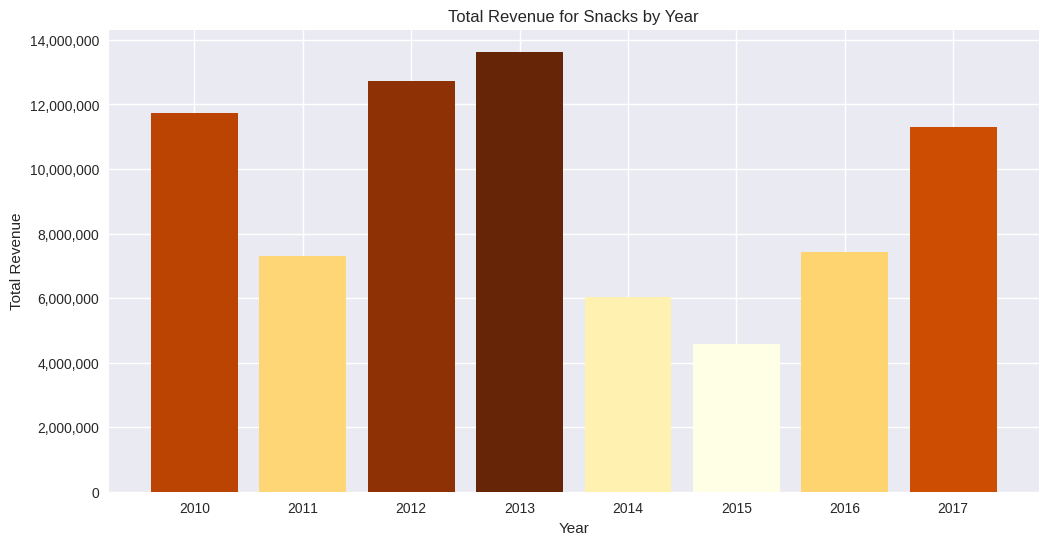

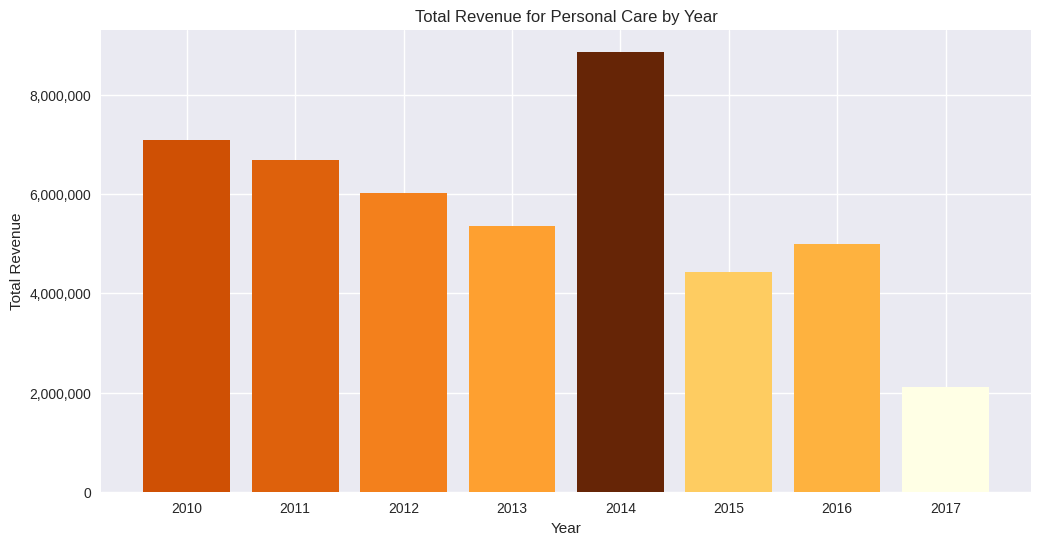

In [ ]:
# Візуалізація динаміки продажів у часі у розрізі категорій товарів
# по рокам

data["year"] = data["order_date"].dt.year
figsize=(15, 10)
sns.barplot(data=data, x="year", y="revenue", hue="item_type", estimator=np.sum, errorbar=("ci", False), palette="Spectral")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Total revenue by Categories and Years")
plt.xlabel("Years")
plt.ylabel("Total revenue")
plt.show()

# Фільтруємо дані по кожній категорії і будуємо окремий графік
# Унікальні категорії товарів
categories = data["item_type"].unique()

# Генерація графіків для кожної категорії
for category in categories:
    plt.figure(figsize=(12, 6))

    # Фільтрація даних по категорії
    category_data = data[data["item_type"] == category]

    # Групування доходів по роках
    total_revenue_by_year = category_data.groupby("year")["revenue"].sum().reset_index()

    # Нормалізація значень для градієнта
    normalized_revenue = (total_revenue_by_year["revenue"] - total_revenue_by_year["revenue"].min()) / \
                         (total_revenue_by_year["revenue"].max() - total_revenue_by_year["revenue"].min())

    # Перетворення нормалізованих значень у палітру кольорів
    colors = plt.cm.YlOrBr(normalized_revenue)

    # Побудова графіка з градієнтною заливкою
    plt.bar(total_revenue_by_year["year"], total_revenue_by_year["revenue"], color=colors)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.title(f"Total Revenue for {category} by Year")
    plt.xlabel("Year")
    plt.ylabel("Total Revenue")

    plt.show()

<ipython-input-95-79ba65d57150>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x="year", y="revenue", estimator=np.sum, errorbar=("ci", False), palette="YlOrBr")


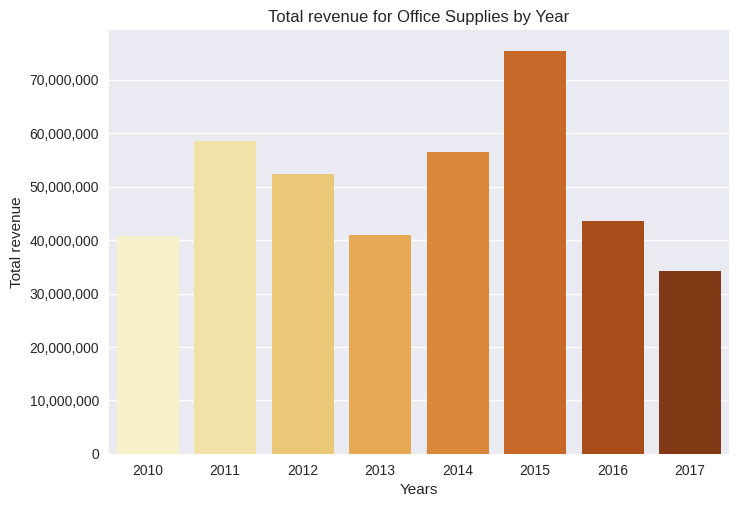

In [ ]:
# Візуалізація динаміки продажів у часі у розрізі довільної категорії Office Supplies по рокам

filtered_data = data[data["item_type"] == "Office Supplies"]  # Вибір категорії
sns.barplot(data=filtered_data, x="year", y="revenue", estimator=np.sum, errorbar=("ci", False), palette="YlOrBr")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Total revenue for Office Supplies by Year")
plt.xlabel("Years")
plt.ylabel("Total revenue")
plt.show()

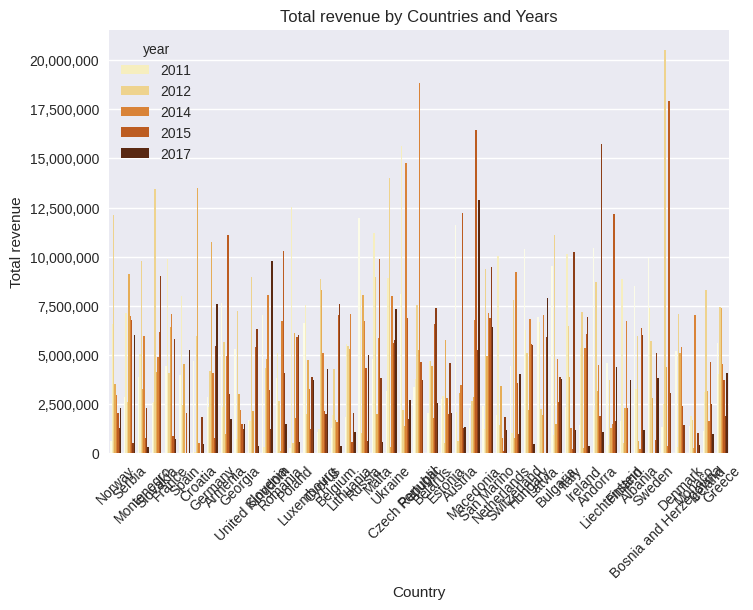

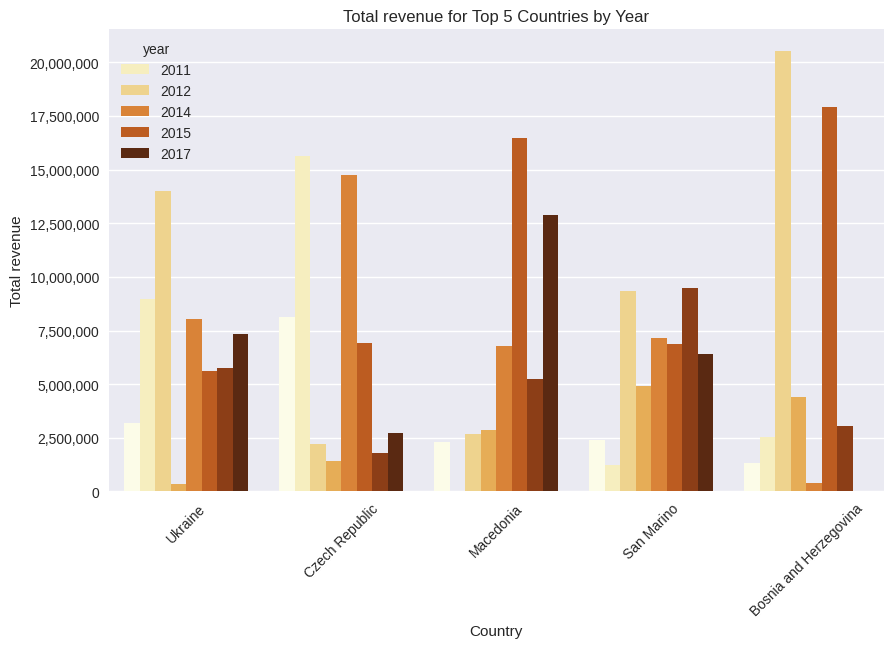

In [ ]:
# Візуалізація динаміки продажів у часі у розрізі країн
figsize=(12, 8)
data["year"] = data["order_date"].dt.year

sns.barplot(data=data, x="country_name", y="revenue", hue="year", estimator=np.sum, errorbar=("ci", False), palette="YlOrBr")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Total revenue by Countries and Years")
plt.xlabel("Country")
plt.ylabel("Total revenue")
plt.tick_params(axis='x', rotation=45)
plt.show()


# Визначаємо топ-5 країн за продажами
top_5_countries = data.groupby("country_name")["revenue"].sum().nlargest(5).index

# Фільтруємо дані для топ-5 країн
filtered_data = data[data["country_name"].isin(top_5_countries)]

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x="country_name", y="revenue", hue="year", estimator=np.sum, errorbar=("ci", False), palette="YlOrBr")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Total revenue for Top 5 Countries by Year")
plt.xlabel("Country")
plt.ylabel("Total revenue")
plt.xticks(rotation=45)
plt.show()


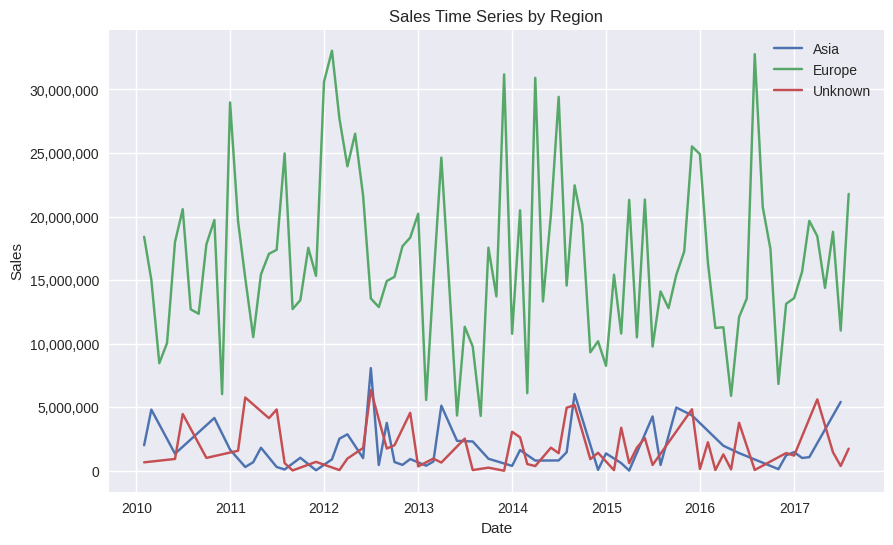

In [ ]:
# Візуалізація динаміки продажів у часі у розрізі регіонів
sales_by_region = data.groupby([pd.Grouper(key="order_date", freq="ME"), "region"])["revenue"].sum().reset_index()
plt.figure(figsize=(10, 6))

for region in sales_by_region["region"].unique():
    subset = sales_by_region[sales_by_region["region"] == region]
    plt.plot(subset["order_date"], subset["revenue"], label=region)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Sales Time Series by Region")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

##  Аналіз продажів товарів за місяцями та днями тижня.

Протягом року спостерігаємо сезонне зменшення доходу в квітні та жовтні. Найбільші продажі в березні та червні.

По дням тижні найбільше продажей бачимо в понеділок, найменше - вівторок та четвер.

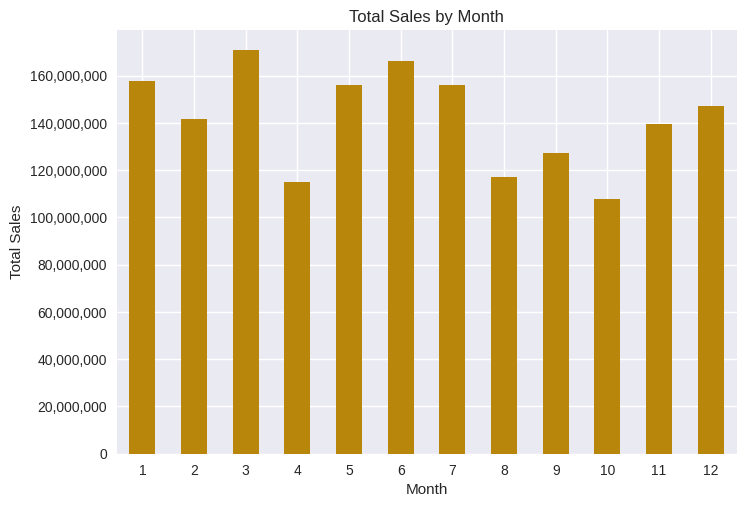

In [ ]:
# Візуалізація динаміки продажів у часі за роками та місяцями

data["year"] = data["order_date"].dt.year
data["month"] = data["order_date"].dt.month
data["day_of_week"] = data["order_date"].dt.dayofweek  # Monday=0, Sunday=6

# Загальні продажі по місяцям
monthly_sales = data.groupby("month")["revenue"].sum()
monthly_sales.plot(
    kind="bar", xlabel="Month", ylabel="Total Sales", title="Total Sales by Month", color="darkgoldenrod"
)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0)
plt.show()


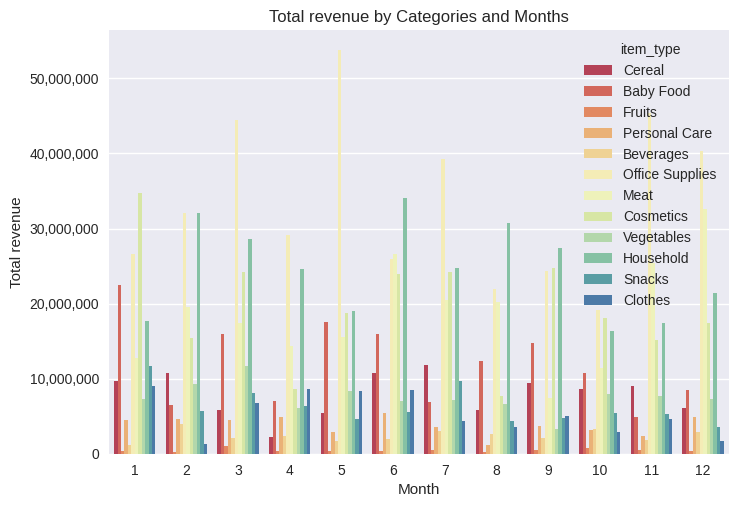

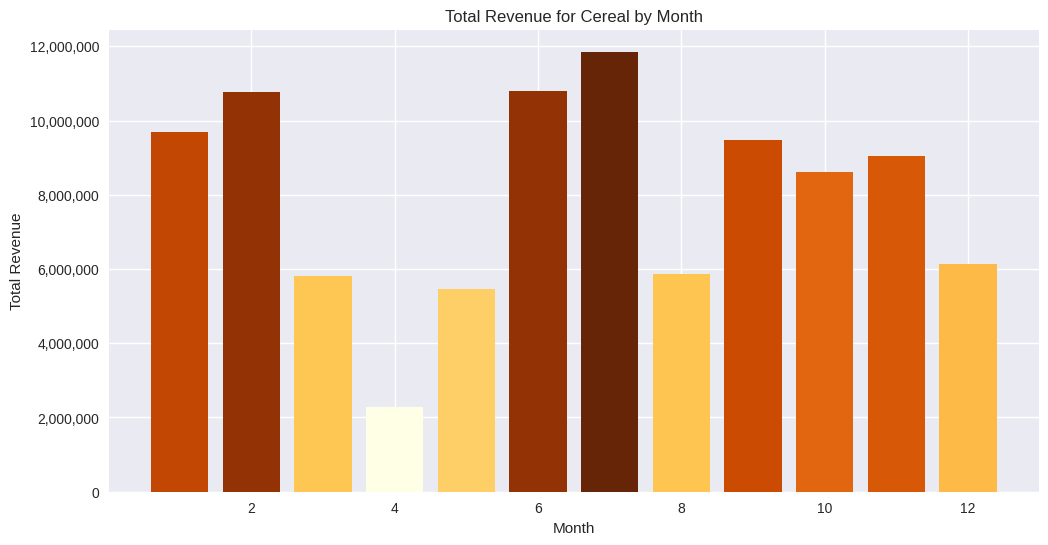

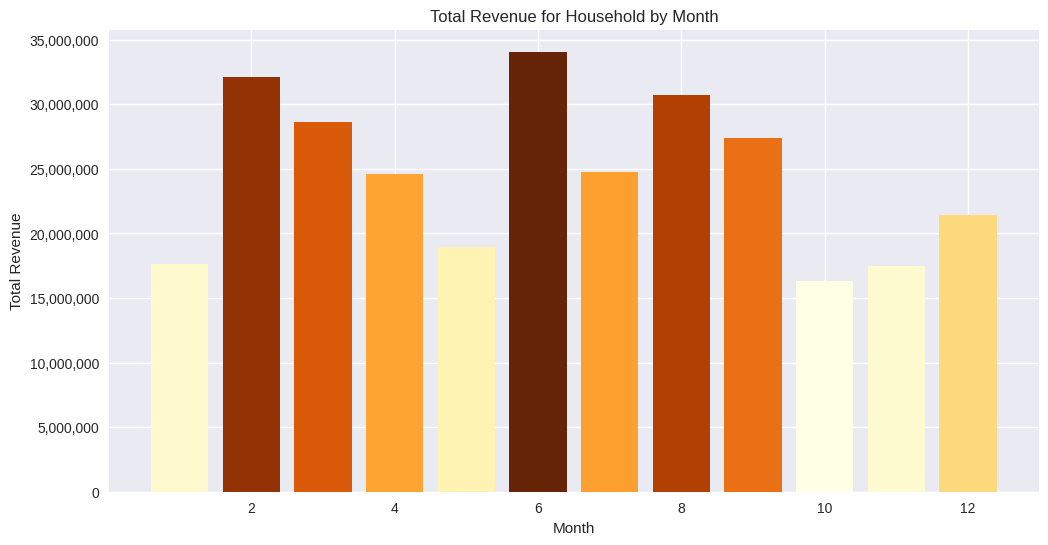

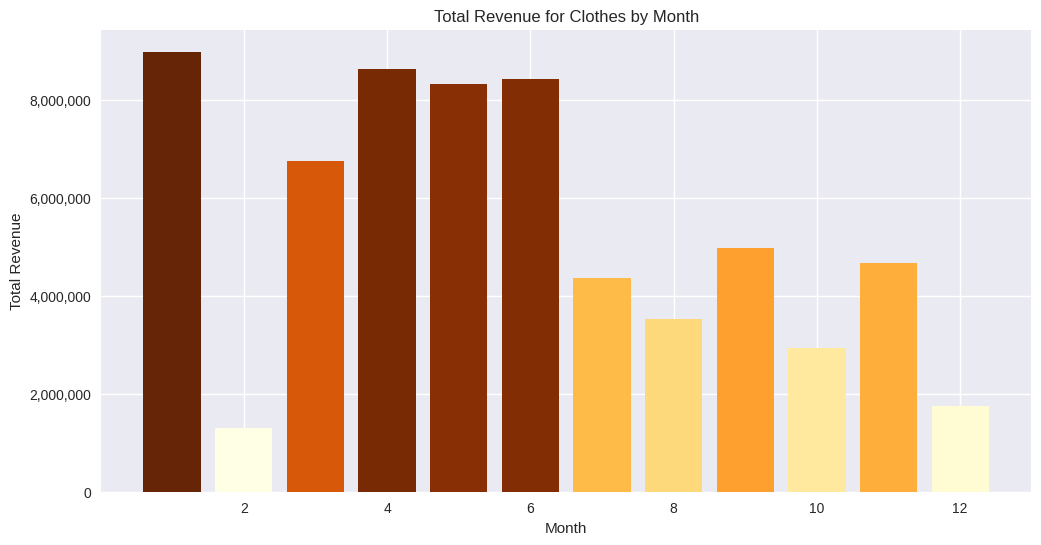

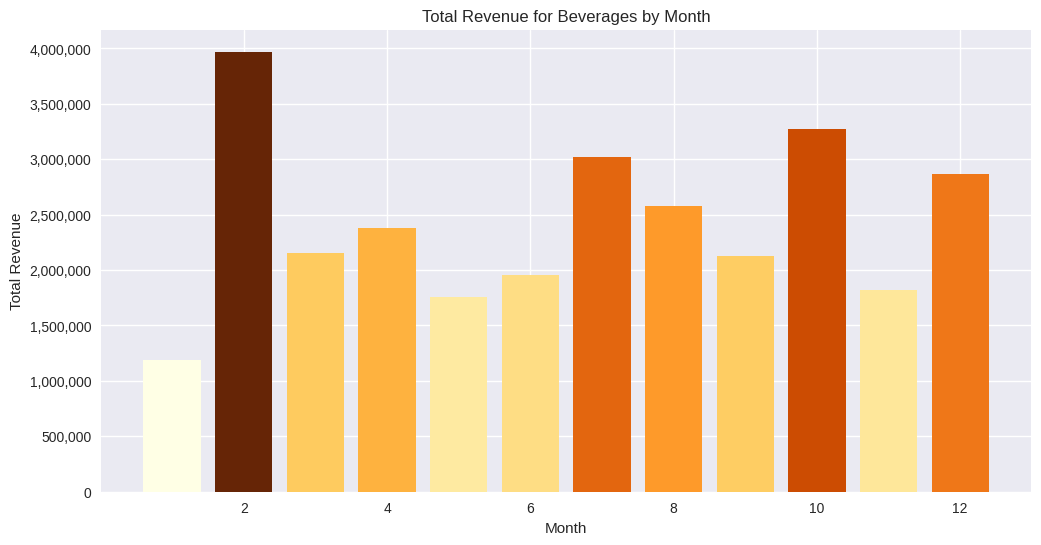

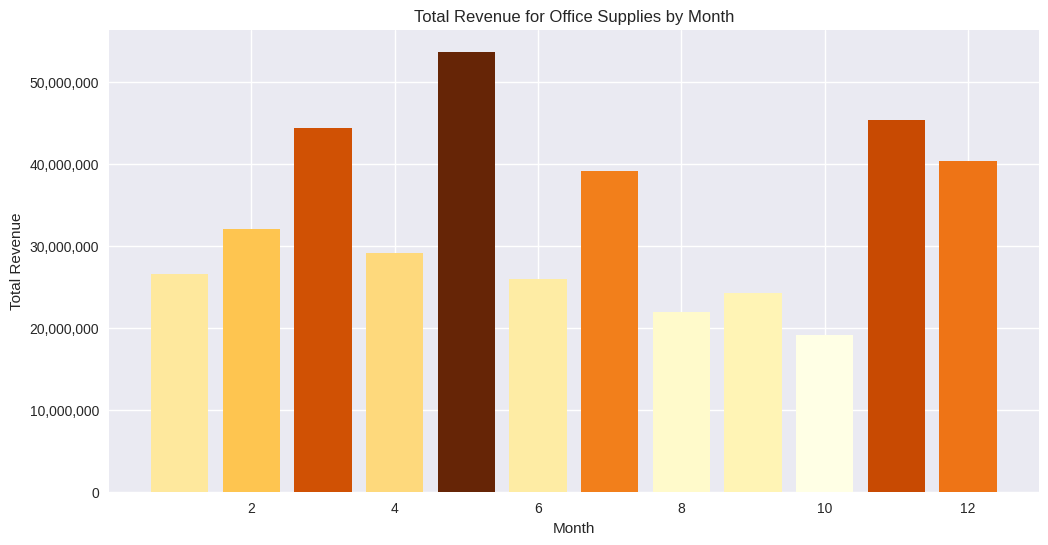

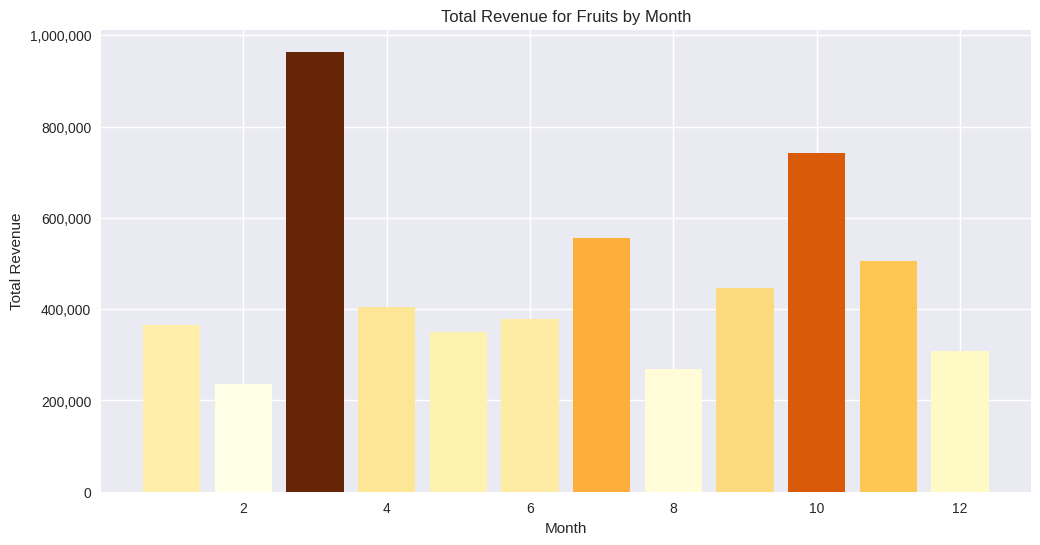

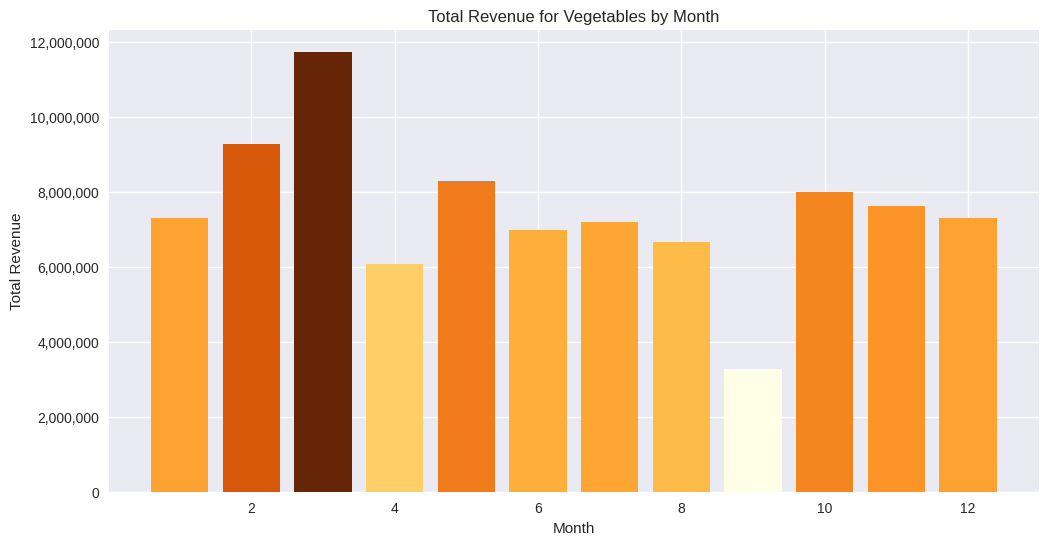

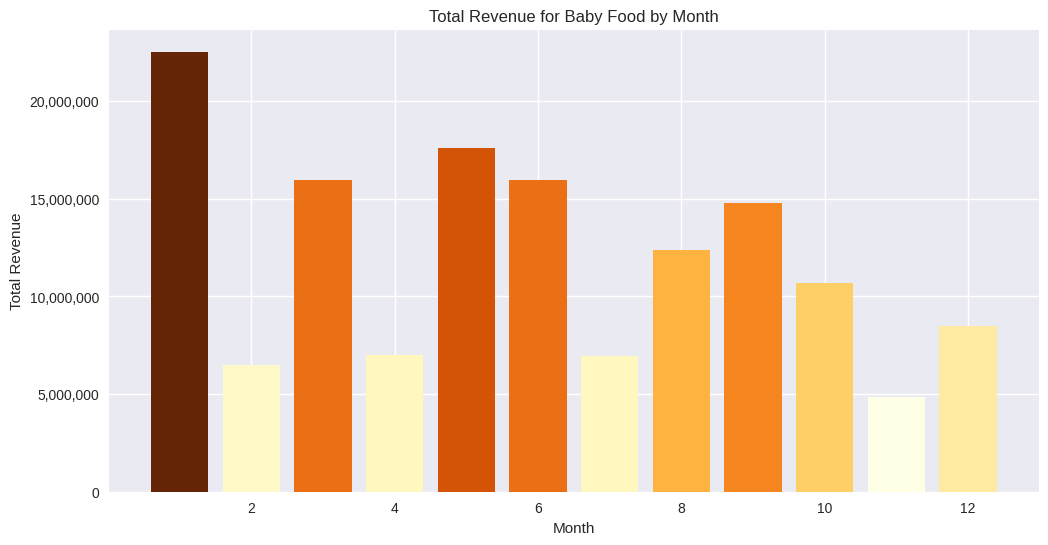

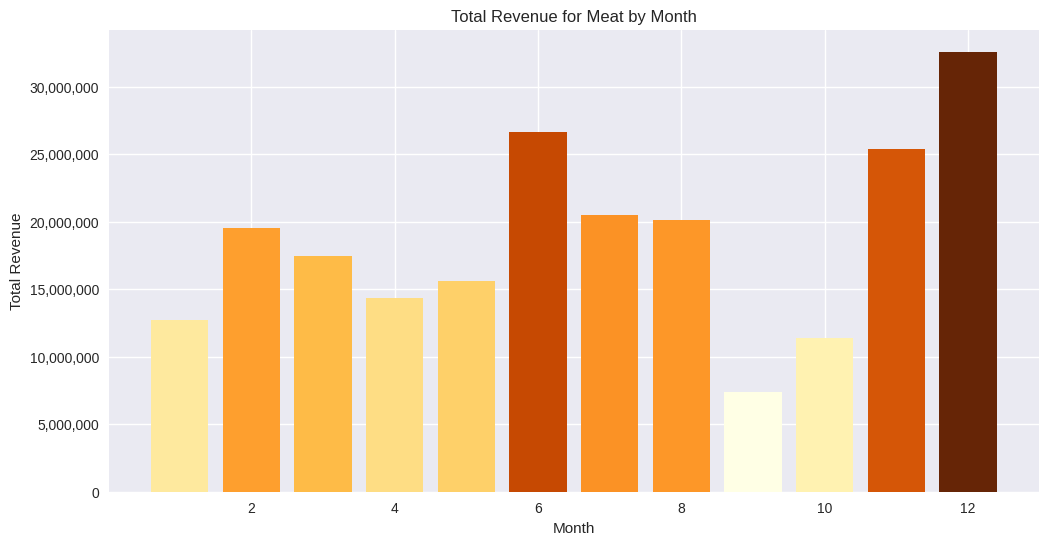

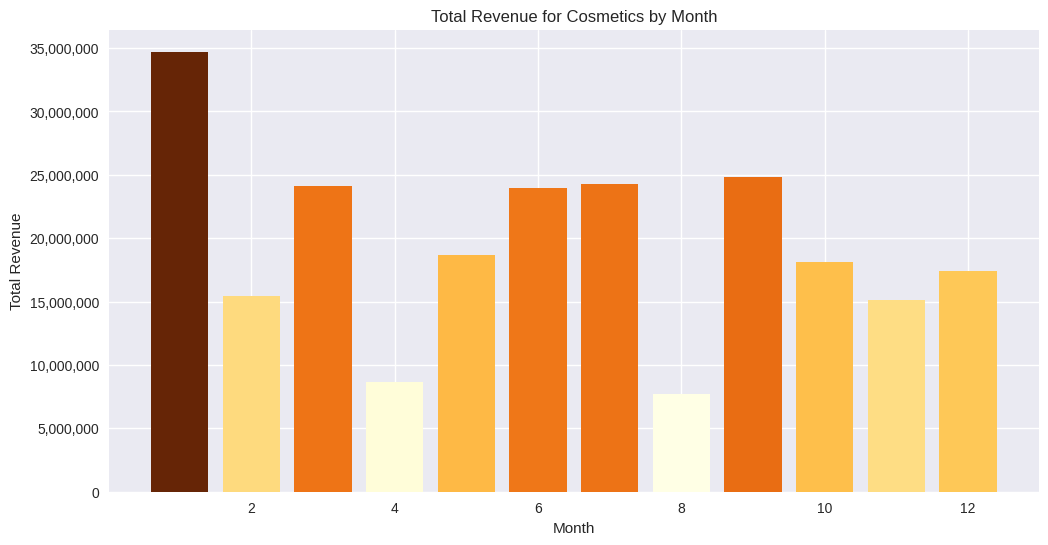

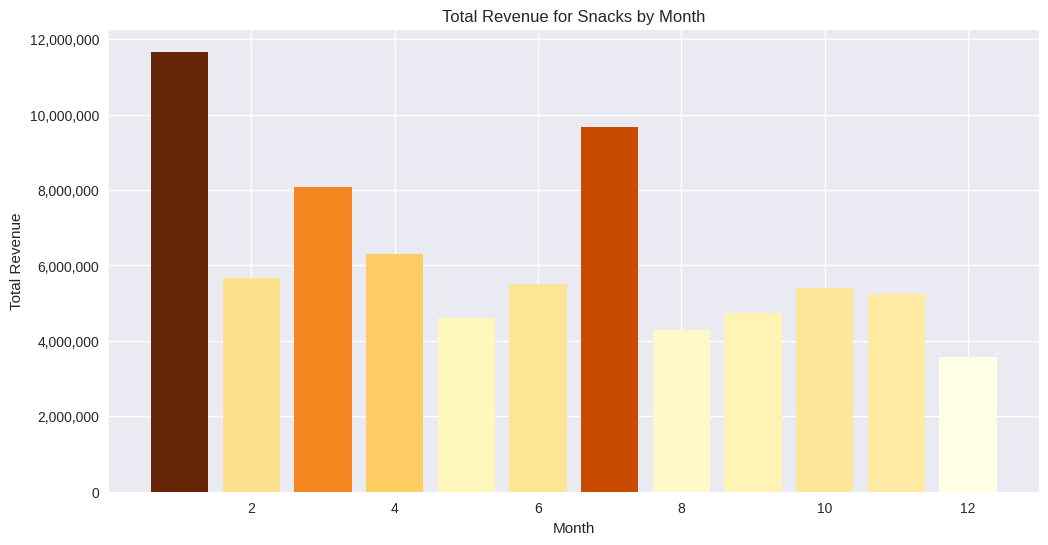

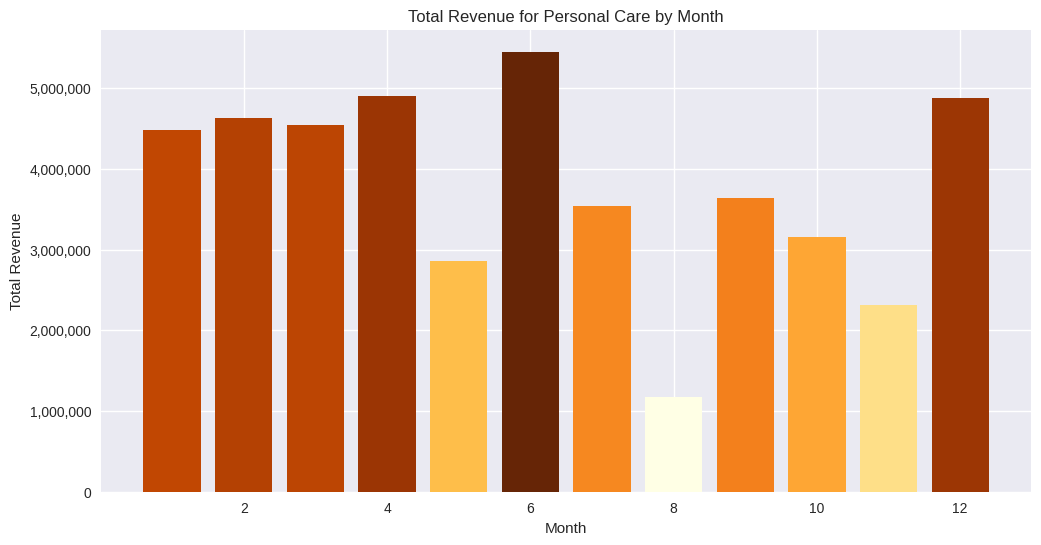

In [ ]:
# Візуалізація динаміки продажів у часі у розрізі категорій товарів
# по місяцям
figsize=(15, 10)
data["month"] = data["order_date"].dt.month
sns.barplot(data=data, x="month", y="revenue", hue="item_type", estimator=np.sum, errorbar=("ci", False), palette="Spectral")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Total revenue by Categories and Months")
plt.xlabel("Month")
plt.ylabel("Total revenue")
plt.show()


# Фільтруємо дані по кожній категорії і будуємо окремий графік
# Унікальні категорії товарів
categories = data["item_type"].unique()

# Генерація графіків для кожної категорії
for category in categories:
    plt.figure(figsize=(12, 6))

    # Фільтрація даних по категорії
    category_data = data[data["item_type"] == category]

    # Групування доходів по місяцях
    total_revenue_by_month = category_data.groupby("month")["revenue"].sum().reset_index()

    # Нормалізація значень для градієнта
    normalized_revenue = (total_revenue_by_month["revenue"] - total_revenue_by_month["revenue"].min()) / \
                         (total_revenue_by_month["revenue"].max() - total_revenue_by_month["revenue"].min())

    # Перетворення нормалізованих значень у палітру кольорів
    colors = plt.cm.YlOrBr(normalized_revenue)

    # Побудова графіка з градієнтною заливкою
    plt.bar(total_revenue_by_month["month"], total_revenue_by_month["revenue"], color=colors)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.title(f"Total Revenue for {category} by Month")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")

    plt.show()


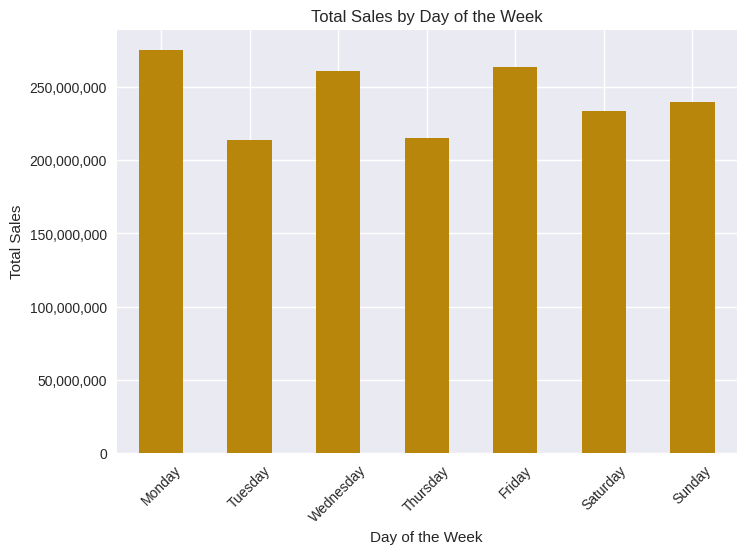

In [ ]:
# Загальні продажі по дням тижня
day_of_week_sales = data.groupby("day_of_week")["revenue"].sum()
day_of_week_sales.index = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
day_of_week_sales.plot(
    kind="bar",
    xlabel="Day of the Week",
    ylabel="Total Sales",
    title="Total Sales by Day of the Week",
    color="darkgoldenrod"
)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()


#**Reporting**